# Chapter 7

## Question 6

In which we do polynomial regression and step-function fitting on the `Wage` data set

In [37]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker

import sklearn.linear_model
import sklearn.preprocessing 
import sklearn.pipeline

import statsmodels.stats.anova

sns.set(style="whitegrid")

In [2]:
wage_data = sm.datasets.get_rdataset("Wage", "ISLR").data
wage_data.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


### (a) Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree. How does this degree compare to ANOVA hypothesis test results? Plot the fit.

In [26]:
# The R example didn't include the interaction terms, but I will here, using PolynomialFeatures
# which includes all polynomial combinations of the features with degree less than or equal to the specified degree.
X = wage_data.age.to_numpy().reshape(-1, 1)
y = wage_data.wage
score_list = []
for degree in range(1,20):
    pipe = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree), sklearn.linear_model.LinearRegression())
    scores = sklearn.model_selection.cross_val_score(pipe, X,y, scoring="neg_mean_squared_error", cv=5)
    score = -np.mean(scores)
    print(f"degree: {degree}, score: {score:.2f}")
    score_list.append(score)                                       

degree: 1, score: 1675.01
degree: 2, score: 1599.60
degree: 3, score: 1594.73
degree: 4, score: 1593.91
degree: 5, score: 1595.43
degree: 6, score: 1594.93
degree: 7, score: 1598.93
degree: 8, score: 1599.50
degree: 9, score: 1599.42
degree: 10, score: 1599.11
degree: 11, score: 1599.05
degree: 12, score: 1599.52
degree: 13, score: 1606.04
degree: 14, score: 1615.53
degree: 15, score: 1628.29
degree: 16, score: 1642.85
degree: 17, score: 1657.75
degree: 18, score: 1671.86
degree: 19, score: 1684.44


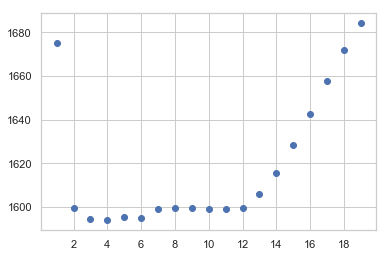

In [29]:
plt.scatter(range(1,20), score_list)
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.show()

Cross-validation suggests optimal degree = 3  (or maybe 4). What does ANOVA say?

In [38]:
results = []
for degree in range(1,20):
    features = sklearn.preprocessing.PolynomialFeatures(degree=degree).fit_transform(X)
    model = sm.OLS(y, features)
    result =  model.fit()
    results.append(result)

In [61]:
statsmodels.stats.anova.anova_lm(*results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,2.287860e+05,43.141654,5.980246e-11
2,2996.0,4.777674e+06,1.0,1.575569e+04,2.971015,8.487182e-02
3,2995.0,4.771604e+06,1.0,6.070152e+03,1.144635,2.847613e-01
4,2994.0,4.770322e+06,1.0,1.282563e+03,0.241850,6.229092e-01
5,2993.0,4.766389e+06,1.0,3.932258e+03,0.741497,3.892508e-01
6,2993.0,4.764599e+06,-0.0,1.790520e+03,-inf,NaN
7,2993.0,4.764136e+06,-0.0,4.624213e+02,-inf,NaN
8,2993.0,4.764981e+06,-0.0,-8.441901e+02,inf,NaN
9,2993.0,4.771202e+06,-0.0,-6.221352e+03,inf,NaN


The above suggests that only the quadratic terms are significant. Plot the d=2 and d=3 fits to the data

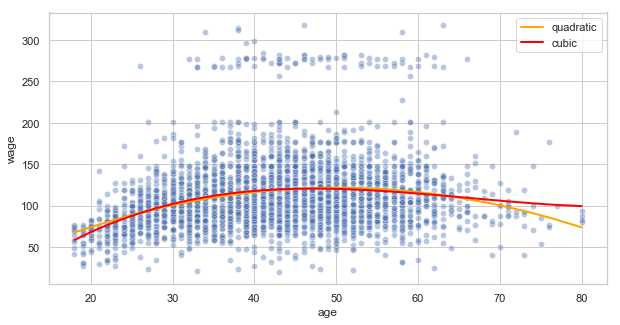

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
quadratic = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(2), sklearn.linear_model.LinearRegression())
cubic = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(3), sklearn.linear_model.LinearRegression())
quadratic.fit(X, y)
quadratic_pred = quadratic.predict(X)
new_x, new_y = zip(*sorted(zip(wage_data.age, quadratic_pred)))
sns.scatterplot(x="age", y="wage", data=wage_data, alpha=0.4, ax=ax)
plt.plot(new_x, new_y, label="quadratic", c="orange", lw=2)

cubic.fit(X, y)
cubic_pred = cubic.predict(X)
new_x, new_y = zip(*sorted(zip(wage_data.age, cubic_pred)))
plt.plot(new_x, new_y, label="cubic", c="red", lw=2)
plt.legend()


### (b) Fit a step function to predict `wage` using `age`, and perform cross-validation to choose the number of steps. Plot.